<a href="https://colab.research.google.com/github/Bidisha28/Mini-Project-ML/blob/master/Mini_Project_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install bing-image-downloader

In [2]:
! pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 2.5MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
cd /content/drive/My Drive/ML-Mini Project-August-2020

/content/drive/My Drive/ML-Mini Project-August-2020


In [4]:
!mkdir Images

In [6]:
cd Images

/content/drive/My Drive/ML-Mini Project-August-2020/Images


In [7]:
from bing_image_downloader import downloader
downloader.download('Lemon Fruit',limit = 30,output_dir = 'pictures')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.pam-exotic.com/wp-content/uploads/2015/10/24822300_xl.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images6.fanpop.com/image/photos/34900000/Lemon-fruit-34914820-1000-1000.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.waimeanurseries.co.nz/assets/our-products/fruit-trees/citrus/lemon-lemonade/Lemonade-Dwarf.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.planetorganic.com/images/products/large/1842.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://iheartsomething.files.wordpress.com/2013/05/lemon1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://images6.fanpop.com/image/photos/34900000/Lemon-fruit-34914817-1000-833.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://images6.fanpop.com/image/photos/34900000/Lemon-fruit-34914824-3000-2000.jpg
[%] File Downloaded !

[%] Downloading Image #

In [8]:
from bing_image_downloader import downloader
downloader.download('Kiwi Fruit',limit = 30,output_dir = 'pictures')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://health.trythis.co/wp-content/uploads/sites/2/2017/11/Kiwi-Fruit3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://fodmap-publicsite-us-east-2.s3.amazonaws.com/production/media/images/kiwi_fruit.original.png
[%] File Downloaded !

[%] Downloading Image #3 from https://powerfoodz.files.wordpress.com/2013/08/15433078_xxl1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.onlyfoods.net/wp-content/uploads/2012/06/Kiwi-Fruit.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://cdn1.medicalnewstoday.com/content/images/articles/271/271232/sliced-kiwi-fruit.jpg
[!] Issue getting: http://cdn1.medicalnewstoday.com/content/images/articles/271/271232/sliced-kiwi-fruit.jpg
[!] Error:: <urlopen error [Errno -2] Name or service not known>
[%] Downloading Image #5 from https://eatwellcachecounty.files.wordpress.com/2015/02/kiwis-close-up.jpg
[%] File Downloaded !

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
# Reshaping and flattening of data
disp_pic = []
flat_pic = []
pic = []
path ='/content/drive/My Drive/ML-Mini Project-August-2020/Images/pictures/'
for dirpath, dirnames, filenames in os.walk(path):
  for files in filenames:
    dis = dirpath.split('/')[-1]
    disp_pic.append(dis)
    img = imread(f'{path}{dis}/{files}')
    re_pic = resize(img,(100,100,3))
    flat_pic.append(re_pic.flatten())
    pic.append(re_pic)
flat_pic = np.array(flat_pic)
disp_pic = np.array(disp_pic)
pic= np.array(pic)

In [13]:
print(flat_pic)

[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 1.         1.         1.        ]
 ...
 [0.99215686 0.99215686 0.99215686 ... 0.99215686 0.99215686 0.99215686]
 [0.99215686 0.99215686 0.99215686 ... 0.99215686 0.99215686 0.99215686]
 [0.99215686 0.99215686 0.99215686 ... 0.99215686 0.99215686 0.99215686]]


In [14]:
#Creating DataFrame
df = pd.DataFrame(flat_pic)
df['Output'] = disp_pic
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999,Output
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,Lemon Fruit
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Lemon Fruit
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Lemon Fruit
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Lemon Fruit
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,Lemon Fruit

In [15]:
df['Output'].value_counts()

Kiwi Fruit     30
Lemon Fruit    30
Name: Output, dtype: int64

In [17]:
# Training and testing data.
x = df.drop('Output',axis=1).values
y = df['Output'].values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [19]:
# Using gridsearch_cv for best param.
param= {'n_neighbors':np.arange(1,48)}
model = KNeighborsClassifier()
model_cv = GridSearchCV(model,param)
model_cv.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
model_cv.best_params_

{'n_neighbors': 1}

In [21]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
y_pred= model.predict(x_test)
y_pred

array(['Lemon Fruit', 'Kiwi Fruit', 'Kiwi Fruit', 'Lemon Fruit',
       'Lemon Fruit', 'Lemon Fruit', 'Kiwi Fruit', 'Kiwi Fruit',
       'Lemon Fruit', 'Lemon Fruit', 'Lemon Fruit', 'Kiwi Fruit',
       'Kiwi Fruit', 'Kiwi Fruit', 'Kiwi Fruit'], dtype=object)

In [23]:
y_test

array(['Lemon Fruit', 'Kiwi Fruit', 'Kiwi Fruit', 'Lemon Fruit',
       'Lemon Fruit', 'Lemon Fruit', 'Kiwi Fruit', 'Kiwi Fruit',
       'Kiwi Fruit', 'Lemon Fruit', 'Lemon Fruit', 'Lemon Fruit',
       'Kiwi Fruit', 'Kiwi Fruit', 'Kiwi Fruit'], dtype=object)

In [24]:
# Knowing the accuracy of the model.
accuracy_score(y_test,y_pred)

0.8666666666666667

In [25]:
confusion_matrix(y_test,y_pred)

array([[7, 1],
       [1, 6]])

In [29]:
pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,Kiwi Fruit,Lemon Fruit,All
Actual,,,
Kiwi Fruit,7,1,8
Lemon Fruit,1,6,7
All,8,7,15


In [30]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

  Kiwi Fruit       0.88      0.88      0.88         8
 Lemon Fruit       0.86      0.86      0.86         7

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



array(['Kiwi Fruit'], dtype=object)

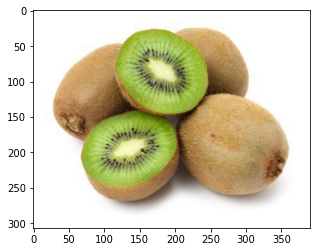

In [33]:
#Predicting for any new image
fl = []
i = imread('https://img.thrfun.com/img/010/392/kiwis_l1.jpg')
re= resize(i,(100,100,3))
fl.append(re.flatten())
fl = np.array(fl)
plt.imshow(i)
y_pred = model.predict(fl)
y_pred